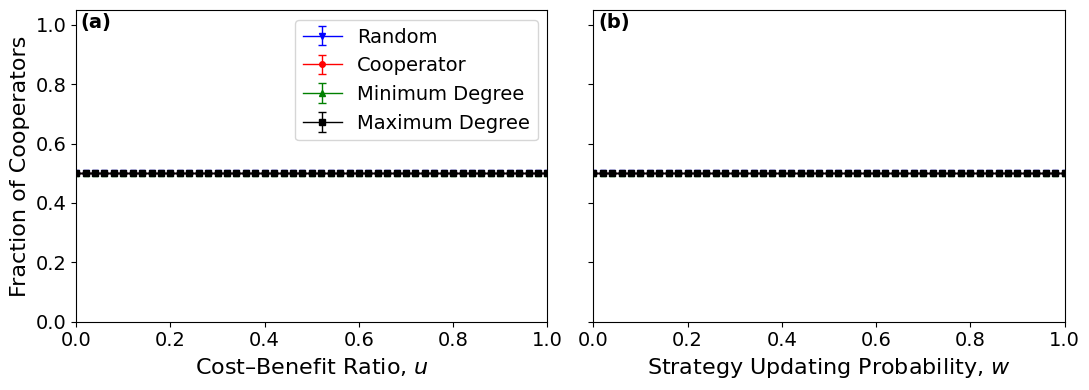

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_comparison(u_vals, results_left, results_right):
    """
    Left: fraction of cooperators vs u, plot mean ± stderr
    Right: fraction of cooperators vs w, plot mean ± stderr
    """
    # Color/marker mapping for different strategies
    style_map = {
        ('Random ', 0.1):         {'color': 'blue',   'marker': 'v', 'ls': '-'},
        ('Cooperator ', 0.1):     {'color': 'red',    'marker': 'o', 'ls': '-'},
        ('Minimum Degree ', 0.1): {'color': 'green',  'marker': '^', 'ls': '-'},
        ('Maximum Degree ', 0.1): {'color': 'black',  'marker': 's', 'ls': '-'},
    }

    # Create subplots with shared y-axis
    fig, (ax_l, ax_r) = plt.subplots(1, 2, figsize=(11, 4), sharey=True)

    # ---------- Left plot: mean ± stderr ----------
    for key, means in results_left.items():
        if 'stderr' in key[0]:
            continue
        # Extract base strategy name and find corresponding stderr
        base = key[0].strip()
        stderr_key = (f"{base} stderr", key[1])
        stderrs = results_left.get(stderr_key, None)

        # Get style parameters for this strategy
        sty = style_map.get(key, {})
        ax_l.errorbar(
            u_vals, means, yerr=stderrs,
            label=base,
            color=sty.get('color', 'blue'),
            marker=sty.get('marker', 'o'),
            ls=sty.get('ls', '-'),
            ms=4, lw=1, capsize=3
        )

    # Set left subplot properties
    ax_l.set_xlabel('Cost–Benefit Ratio, $u$')
    ax_l.set_ylabel('Fraction of Cooperators')
    ax_l.set_xlim(0, 1)
    ax_l.set_ylim(0, 1.05)
    ax_l.legend(loc='best')
    ax_l.text(0.01, 0.99, '(a)', transform=ax_l.transAxes,
              fontsize=14, fontweight='bold', va='top')

    # ---------- Right plot: mean ± stderr ----------
    for key, means in results_right.items():
        if 'stderr' in key[0]:
            continue
        # Extract base strategy name and find corresponding stderr
        base = key[0].strip()
        stderr_key = (f"{base} stderr", key[1])
        stderrs = results_right.get(stderr_key, None)

        # Get style parameters for this strategy
        sty = style_map.get(key, {})
        ax_r.errorbar(
            u_vals, means, yerr=stderrs,
            label=base if ax_l.legend_ is None else None,  # Avoid duplicate legend
            color=sty.get('color', 'blue'),
            marker=sty.get('marker', 'o'),
            ls=sty.get('ls', '-'),
            ms=4, lw=1, capsize=3
        )

    # Set right subplot properties
    ax_r.set_xlabel('Strategy Updating Probability, $w$')
    ax_r.set_xlim(0, 1)
    ax_r.text(0.01, 0.99, '(b)', transform=ax_r.transAxes,
              fontsize=14, fontweight='bold', va='top')

    plt.tight_layout()
    plt.show()

# Update matplotlib font settings for consistent visualization
mpl.rcParams.update({
    'axes.labelsize': 16,   # Font size for X and Y axis labels
    'axes.titlesize': 16,   # Font size for subplot titles
    'xtick.labelsize': 14,  # Font size for X-axis tick labels
    'ytick.labelsize': 14,  # Font size for Y-axis tick labels
    'legend.fontsize': 14,  # Font size for legend
})

# Define the axis values (51 points from 0 to 1)
# For the left subplot, this represents u (cost-benefit ratio); for the right, w (strategy updating probability)
u_values = np.linspace(0, 1, 51)

# Probabilistic strategy (Random in legend) - all values set to mean 0.5, stderr 0
probabilistic_means = [0.5] * 51
probabilistic_stderrs = [0] * 51

# Random strategy (Cooperator in legend) - all values set to mean 0.5, stderr 0
random_means = [0.5] * 51
random_stderrs = [0] * 51

# Min degree strategy (Minimum Degree in legend) - all values set to mean 0.5, stderr 0
min_degree_means = [0.5] * 51
min_degree_stderrs = [0] * 51

# Max degree strategy (Maximum Degree in legend) - all values set to mean 0.5, stderr 0
max_degree_means = [0.5] * 51
max_degree_stderrs = [0] * 51

# Data for varying w: all strategies set to mean 0.5, stderr 0
wrandom_means = [0.5] * 51
wrandom_stderrs = [0] * 51
wprobabilistic_means = [0.5] * 51
wprobabilistic_stderrs = [0] * 51
wmin_means = [0.5] * 51
wmin_stderrs = [0] * 51
wmax_means = [0.5] * 51
wmax_stderrs = [0] * 51

# Data for varying u: Fraction of cooperators for each strategy
results_u = {
    ('Random ', 0.1): random_means,
    ('Random stderr', 0.1): random_stderrs,
    ('Cooperator ', 0.1): probabilistic_means,
    ('Cooperator stderr', 0.1): probabilistic_stderrs,
    ('Minimum Degree ', 0.1): min_degree_means,
    ('Minimum Degree stderr', 0.1): min_degree_stderrs,
    ('Maximum Degree ', 0.1): max_degree_means,
    ('Maximum Degree stderr', 0.1): max_degree_stderrs
}

# Data for varying w: Fraction of cooperators for each strategy
results_w = {
    ('Random ', 0.1): wrandom_means,
    ('Random stderr', 0.1): wrandom_stderrs,
    ('Cooperator ', 0.1): wprobabilistic_means,
    ('Cooperator stderr', 0.1): wprobabilistic_stderrs,
    ('Minimum Degree ', 0.1): wmin_means,
    ('Minimum Degree stderr', 0.1): wmin_stderrs,
    ('Maximum Degree ', 0.1): wmax_means,
    ('Maximum Degree stderr', 0.1): wmax_stderrs
}

# Call the function to plot the two sets of results in side-by-side subplots
plot_comparison(u_values, results_u, results_w)